# Universidade Federal de Minas Gerais
## Computação Evolucionária - TTC
Daniela Amaral Sampaio - 2017074351

Matheus Brito Faria - 2017074386

## 1. Introdução

Implementar um Algoritmo Evolucionário para solucionar o problema das N­Rainhas
abaixo:

“Dado um tabuleiro de xadrez regular (NxN) e N rainhas, posicione as N­Rainhas no tabuleiro
de forma que elas não se coloquem em xeque”.


## 2. Implementação

### 2.1. Importação de bibliotecas
Inicia-se com a importação de todas as bibliotecas que serão utilizadas.

In [ ]:
import time
import numpy as np
import random as rd
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook
plt.style.use('grayscale')
rd.seed(42)

 ### 2.2. Definição de constantes

É definida a constante de *crossover_rate*, que será sempre igual a 1, ou seja, a probabilidade de criar duas novas soluções candidatas descendentes da combinação dos genes de dois cromossomos pais é 100%, sempre ocorrerá.

A constante *mutation_rate* igual a 0.8 corresponde ao fato de que dos descentendes gerados pelo crossover, 80% irá sofrer mutação.

Além disso, o número máximo de interações definido foi de 30 e o tamanho do tabuleiro de xadrex é de 8x8.


In [ ]:
crossover_rate = 1
mutation_rate = 0.8
max_iterations = 30
board_size = 8

### 2.3. Função de inicialização da população

Função que inicializa a população, criando 20 tabuleiros de xadrez, todos com 8 rainhas cada um, distribuídas de forma aleatória.

A distribuição foi feita de forma que cada item do vetor corresponde à linha do tabuleiro e o número corresponde à coluna que a rainha se encontra. Um exemplo está abaixo:

[6, 3, 1, 7, 5, 0, 2, 4]

Nesse caso, a rainha da primeira linha se encontra na coluna 7 (pois a contagem começa em 0), a rainha da segunda linha se encontra na quarta coluna e assim por diante. A representação do tabuleiro, portanto, fica:



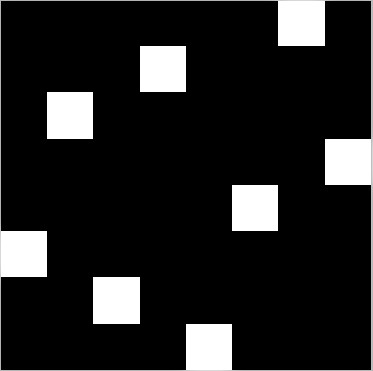

In [ ]:
def init_population(_mu:int = 20, n:int = 8):
    population = []
    for i in range (_mu):
        population.append(rd.sample(range(n), n))
    return population

In [ ]:
population = init_population(20, 8)
print(population)

[[1, 0, 5, 2, 7, 6, 4, 3], [1, 4, 3, 0, 6, 5, 2, 7], [0, 4, 1, 6, 3, 7, 5, 2], [0, 6, 1, 3, 2, 5, 7, 4], [5, 0, 6, 3, 7, 1, 2, 4], [0, 5, 3, 4, 7, 1, 6, 2], [5, 4, 1, 0, 6, 2, 3, 7], [1, 6, 7, 0, 3, 5, 2, 4], [2, 7, 6, 1, 5, 3, 0, 4], [3, 1, 7, 5, 2, 4, 0, 6], [0, 1, 7, 2, 3, 6, 5, 4], [5, 1, 7, 3, 4, 2, 6, 0], [4, 1, 6, 7, 2, 3, 5, 0], [5, 1, 6, 4, 3, 0, 2, 7], [2, 5, 1, 3, 0, 6, 7, 4], [4, 7, 0, 5, 2, 3, 1, 6], [4, 3, 1, 6, 0, 2, 5, 7], [1, 6, 5, 2, 7, 0, 3, 4], [0, 4, 2, 3, 7, 6, 1, 5], [3, 0, 1, 4, 6, 7, 5, 2]]


### 2.4. Função de aptidão

Função que avalia a qualidade de uma solução candidata q(f), que no caso é o número de xeques entre pares de rainhas. Quanto menor é esse valor (idealmente 0), melhor é o resultado do algoritmo, pois significa que não existe xeques entre as rainhas.

In [ ]:
def fitness_nq(solution):
    xeques = 0
    for i in range(0,len(solution)):
        for j in range(0,len(solution)):
            if i!=j:
                if i-solution[i] == j-solution[j] or i+solution[i] == j+solution[j]:
                    xeques+=1
    return xeques

In [ ]:
fitness_nq([2,0,3,1])

0

### 2.5 Operadores de variação


#### 2.5.1. Operador de Crossover
Essa função cria duas novas soluções candidatas (descendentes) a partir da combinação dos genes de dois cromossomos pais. A função checa o tamanho do fenótipo e o divide aleatoriamente em duas partes. O primeiro filho pega a parte inicial do primeiro pai, de acordo com a divisão, e a parte final do segundo pai. O segundo filho, vice-versa.

In [ ]:
def cut_and_crossfill_crossover(parents:list): 
    N = len(parents[0])
    offspring = [
        [0]*N,
        [0]*N
    ]
    pos = int(N*rd.random())
    offspring[0][:pos] = parents[0][:pos]
    offspring[1][:pos] = parents[1][:pos]
    s1 = pos
    s2 = pos
    for i in range(N):
        check1 = 0
        check2 = 0
        for j in range(pos):
            if parents[1][i] == offspring[0][j]:
                check1 = 1
            if parents[0][i] == offspring[1][j]:
                check2 = 1
        if check1 == 0:
            offspring[0][s1] = parents[1][i]
            s1 = s1 + 1
        if check2 == 0:
            offspring[1][s2] = parents[0][i]
            s2 = s2 + 1
    return offspring

In [ ]:
parents = [
    [3, 0, 2, 5, 6, 4, 7, 1], 
    [1, 6, 7, 5, 4, 0, 3, 2]
]

new_candidates = cut_and_crossfill_crossover(parents)
print(new_candidates)

[[3, 0, 2, 5, 6, 4, 7, 1], [1, 6, 7, 5, 4, 0, 3, 2]]


#### 2.5.2. Operador de mutação

Essa função *per_mutation*, quando encaixada na propabilidade dos 80%, seleciona de forma aleatória duas posições em um cromossomo (permutação) e
troca os valores destas posições.

In [ ]:
def per_mutation(candidate: list):
    N = len(candidate)
    assert N > 2
    position_1 = int(rd.random()*N)
    position_2 = int(rd.random()*N)
    while position_1 == position_2:
        position_2 = int(rd.random()*N)
        
    aux = candidate[position_1]
    candidate[position_1] = candidate[position_2]
    candidate[position_2] = aux
    
    return candidate

In [ ]:
candidate = [1, 6, 7, 5, 4, 0, 3, 2]

per_mutation(candidate)

[1, 4, 7, 5, 6, 0, 3, 2]

Nessa função *pop_fitness*, é aplicada a função de aptidão para cada um dos 30 tabuleiros gerados, a fim de observar quais retornam os melhores e piores valores, para fazer a seleção dos pais.

In [ ]:
pop_fitness = [fitness_nq(each_solution) for each_solution in population]
print(pop_fitness)

[12, 8, 10, 8, 8, 6, 10, 6, 8, 6, 14, 16, 10, 8, 6, 12, 8, 10, 10, 10]


### 2.6. Seleção dos melhores pais

Essa função *find_top_2* encontra os 2 melhores e os 2 piores indivíduos da população.

In [ ]:
def find_top_2(evaluation, criterion='min'):
    evaluation = np.array(evaluation)
    evaluation_sorted = sorted(evaluation, reverse=criterion=='max')

    index = np.where(evaluation == evaluation_sorted[0])[0]

    if len(index) > 1:
        index = index[:2]
    else:
        index_2 = np.where(evaluation == evaluation_sorted[1])[0]
        index = np.append(index, index_2[0])
    
    return index 

Nesse exemplo, vemos um print dos índices dos 2 melhores e piores indivíduos, respectivamente:

In [ ]:
evaluation = [6, 12, 20, 2, 76, 16, 10, 2, 10, 18, 10, 22, 2, 8, 12, 14, 10, 12, 10, 6]
print(find_top_2(evaluation))
print(find_top_2(evaluation, criterion='max'))

[3 7]
[ 4 11]


De todos os 30 indivíduos gerados, que são os tabuleiros, a função *select_parents* seleciona 5 aleatóriamente para análises. Os 2 melhores são escolhidos para a realização do crossover, enquanto os 2 piores são eliminados. Esse processo é feito para que a cada geração, restem os melhores indivíduos.

In [ ]:
def select_parents(evaluation:list, population:list):
    evaluation_samples = rd.sample(range(len(evaluation)), 5)
    evaluation = np.array(evaluation)[evaluation_samples]
    index = find_top_2(evaluation)       
    return [population[index[0]], population[index[1]]]

In [ ]:
evaluation = [6, 12, 20, 2, 76, 16, 10, 2, 10, 18, 10, 22, 2, 8, 12, 14, 10, 12, 10, 6]
select_parents(evaluation, population)

[[5, 0, 6, 3, 7, 1, 2, 4], [0, 6, 1, 3, 2, 5, 7, 4]]

A função *create_board* cria um tabuleiro com o tamanho fornecido para mostrar o resultado visualmente.

In [ ]:
def create_board(size, queens):
    image = np.zeros((size, size))

    for i in range(size):
        image[i, queens[i]] = 1
    
    return image

Após a criação do tabuleiro, inicia-se com uma população igual a 20, ou seja, 20 tabuleiros com as peças das rainhas distribuídos de forma aleatória. Enquanto não encontra o melhor resultado da função de aptidão, é feito o crossover, a mutação e a seleção dos indivíduos da população. Ao final desse processo, encontra-se a melhor solução e a quantidade de xeques.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


A melhor solução foi [6, 3, 1, 7, 5, 0, 2, 4] com 0 xeques.


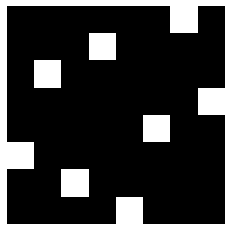

In [ ]:
fig = plt.figure()

plt.ion()
fig.show()
fig.canvas.draw()


population = init_population(_mu=20, n=board_size)
evaluation = [fitness_nq(each_solution) for each_solution in population]
iteration = 0

while 0 not in evaluation and iteration < max_iterations:
    
    if rd.random() <= crossover_rate:
        parents = select_parents(evaluation, population)
        kids = cut_and_crossfill_crossover(parents)
        population += kids    
        
    if rd.random() <= mutation_rate:
        random_sample_index = int(rd.random()*len(population))
        population[random_sample_index] = per_mutation(population[random_sample_index])
        
    evaluation = [fitness_nq(each_solution) for each_solution in population]
    worst_individuals_index = find_top_2(evaluation, criterion='max')
    
    population = [value for index, value in enumerate(population) if index not in worst_individuals_index]
    evaluation = [value for index, value in enumerate(evaluation) if index not in worst_individuals_index]
    
    best_index = find_top_2(evaluation)[0]
    
    ax = fig.add_subplot(1, 1, 1)
    ax.clear()
    ax.grid(False)
    ax.axis('off')
    image = create_board(board_size, population[best_index])
    ax.matshow(image)
    fig.canvas.draw()
    
    iteration += 1
        

best_index = find_top_2(evaluation)[0]
print(f"""A melhor solução foi {population[best_index]} com {evaluation[best_index]} xeques.""")

## 3. Conclusão

Durante a execução do trabalho foi possível utilizar na prática conceitos aprendidos em sala de aula e acredita-se que o resultado final do trabalho tenha sido satisfatório, visto que encontrou-se a melhor solução (com 0 xeques) para o problema proposto